# Cumulative Token, Type, and TTR analysis
One of the supposed features of feminine language is a more complex vocabulary. Is this generally true? Is it true for specific production companies?


In [1]:
import pandas as pd

In [2]:
import math

In [3]:
from matplotlib import pyplot as plt

In [4]:
%pprint

Pretty printing has been turned OFF


In [5]:
all_movies_df = pd.read_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\char_toks.pkl")

In [6]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 11 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
dtypes: float64(2), object(9)
memory usage: 32.1+ KB


In [7]:
all_movies_df.groupby('Gender')['Total_Tok_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,139.0,347.848921,554.563700,2.0,10.5,63.0,446.5,2540.0
m,354.0,314.223164,631.755182,2.0,10.0,45.0,269.5,3941.0
n,139.0,20.949640,40.650387,1.0,6.0,10.0,23.0,412.0


## Adding TTR
I'm going to add a TTR column and Guiraud's modified TTR.

In [8]:
all_movies_df['TTR'] = all_movies_df.Total_Type_Count / all_movies_df.Total_Tok_Count
all_movies_df['G_TTR'] = all_movies_df.Total_Type_Count / (all_movies_df.Total_Tok_Count.map(math.sqrt))

In [9]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{fix, today, perfect, tune, for, disguise, ahh...",1937,0.334043,10.241551
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{white, beauty, maid, what, is, you, hide, fam...",1937,0.703704,6.333333
2,EARLY,m,Snow White,PRO,prince,PRINCE,5.0,"[today, hello, ., one, song]",5.0,"{hello, today, ., one, song}",1937,1.000000,2.236068
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{going, need, amen, for, so, stop, she, your, ...",1937,0.252640,8.864033
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{yes, you, hide, mad, now, child, at, 'll, hig...",1937,0.452632,4.411707


In [10]:
all_movies_df.describe()

,Total_Tok_Count,Total_Type_Count,TTR,G_TTR
count,632.000000,632.000000,632.000000,632.000000
mean,257.117089,85.189873,0.693138,4.967259
std,553.919315,134.593696,0.257380,2.995887
min,1.000000,1.000000,0.166667,0.632456
25%,8.000000,7.000000,0.481947,2.468528
50%,27.500000,21.000000,0.700877,4.024922
75%,174.500000,95.250000,1.000000,7.229228
max,3941.000000,886.000000,1.000000,14.136698


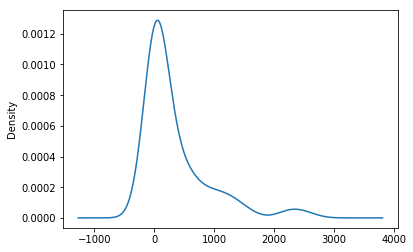

In [51]:
#what do Token count disctributions look like?
all_movies_df[all_movies_df.Gender == 'f']['Total_Tok_Count'].plot(kind="density")

In [52]:
all_movies_df[all_movies_df.Gender == 'f']['Total_Tok_Count'].max()

2540.0

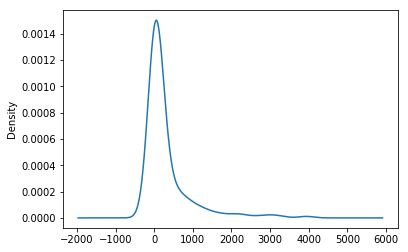

In [53]:
#what do Token count disctributions look like?
all_movies_df[all_movies_df.Gender == 'm']['Total_Tok_Count'].plot(kind="density")

In [54]:
all_movies_df[all_movies_df.Gender == 'm']['Total_Tok_Count'].max()

3941.0

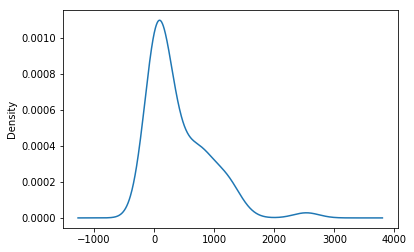

In [55]:
#what do Token count disctributions look like?
all_movies_df[all_movies_df.Role == 'ANT']['Total_Tok_Count'].plot(kind="density")

In [56]:
all_movies_df[all_movies_df.Role == 'ANT']['Total_Tok_Count'].max()

2534.0

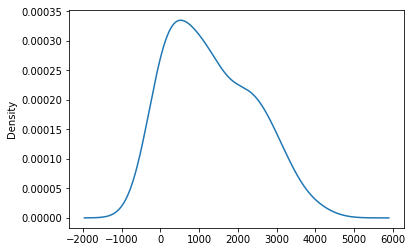

In [57]:
#what do Token count disctributions look like?
all_movies_df[all_movies_df.Role == 'PRO']['Total_Tok_Count'].plot(kind="density")

In [58]:
all_movies_df[all_movies_df.Role == 'PRO']['Total_Tok_Count'].max()

3928.0

As you can see, there's a VERY wide range of Total Token Counts here... The protagonist distribution looks slightly more normal than the antagonist distribution. Both male and female total token counts are very left skewed.

In [59]:
all_movies_df.groupby(['Role','Gender'])['Total_Tok_Count'].describe()

count         mean          std   min     25%     50%     75%  \
Role   Gender                                                                  
ANT    f        12.0   540.333333   427.214303  37.0  146.25   514.5   815.5   
       m        54.0   371.611111   504.720001   2.0   16.50   130.5   650.5   
HELPER f        30.0   358.633333   312.767787   8.0   86.00   333.0   524.0   
       m        68.0   493.455882   648.968031   2.0   86.25   212.0   633.5   
N      f        70.0    64.342857   196.760495   2.0    6.00    13.0    48.0   
       m       207.0    78.893720   167.602796   2.0    8.00    19.0    62.0   
PRO    f        27.0   985.333333   829.225496   2.0  235.00   952.0  1360.5   
       m        25.0  1651.280000  1205.245014   5.0  623.00  1626.0  2676.0   

                  max  
Role   Gender          
ANT    f       1225.0  
       m       2534.0  
HELPER f       1094.0  
       m       3941.0  
N      f       1548.0  
       m       1340.0  
PRO    f       2540.0  
       m       3928.0

Let's try filtering out anything below 50 and see how this changes things.

In [63]:
all_movies_df = all_movies_df[all_movies_df.Total_Tok_Count >=50]

In [64]:
all_movies_df.groupby(['Role','Gender'])['Total_Tok_Count'].describe()

count         mean          std   min     25%     50%      75%  \
Role   Gender                                                                   
ANT    f        11.0   586.090909   416.083755  59.0  204.00   576.0   857.00   
       m        34.0   582.117647   534.585014  81.0  171.00   428.5   828.75   
HELPER f        26.0   410.538462   304.022530  60.0  129.50   363.0   569.25   
       m        54.0   616.037037   676.740243  61.0  178.25   430.0   892.50   
N      f        16.0   235.187500   370.329442  57.0   66.00    90.5   249.50   
       m        58.0   239.568966   254.087850  50.0   86.25   129.0   280.50   
PRO    f        22.0  1206.500000   758.022223  78.0  629.50  1132.5  1521.25   
       m        22.0  1874.636364  1106.614724  68.0  842.75  1994.5  2849.25   

                  max  
Role   Gender          
ANT    f       1225.0  
       m       2534.0  
HELPER f       1094.0  
       m       3941.0  
N      f       1548.0  
       m       1340.0  
PRO    f       2540.0  
       m       3928.0

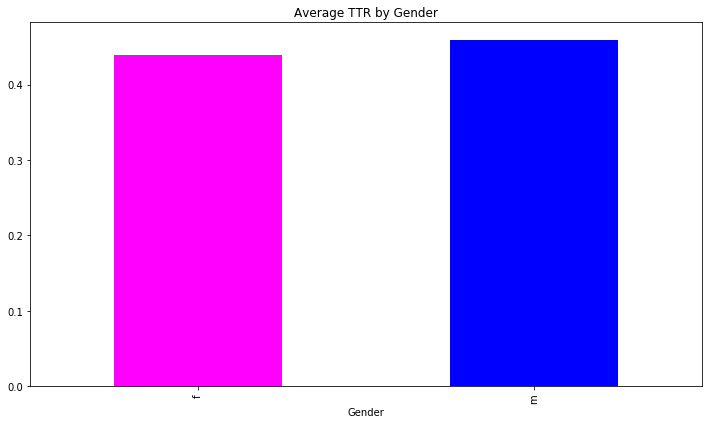

In [65]:
ttr_by_gender = all_movies_df.groupby(['Gender'])['TTR'].describe()['mean']
ttr_by_gender.plot.bar(color = ['magenta', 'blue', 'green'], figsize = (10,6))
plt.title("Average TTR by Gender")
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_ttr_gen.png")

If we view TTR as a measure of vocabulary complexity, it looks like overall men have a slightly higher vocabulary complexity.

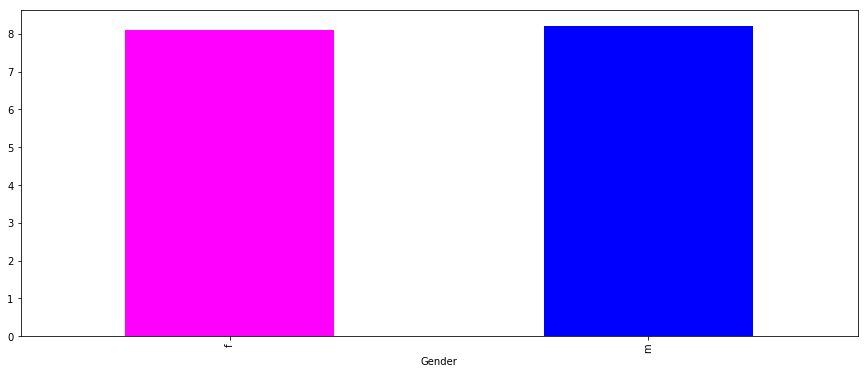

In [66]:
gttr_by_gender = all_movies_df.groupby(['Gender'])['G_TTR'].describe()['mean']
gttr_by_gender.plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

Female speakers also have a lower GTTR, but not by much at all

In [67]:
#get rid of 'n'
all_movies_df = all_movies_df[all_movies_df.Gender != 'n']

In [68]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 628
Data columns (total 14 columns):
Disney_Period       243 non-null object
Gender              243 non-null object
Movie               243 non-null object
Role                243 non-null object
Speaker             243 non-null object
Speaker_Status      243 non-null object
Total_Tok_Count     243 non-null float64
Total_Toks          243 non-null object
Total_Type_Count    243 non-null float64
Total_Types         243 non-null object
Year                243 non-null object
TTR                 243 non-null float64
G_TTR               243 non-null float64
AVG_K_BAND          243 non-null float64
dtypes: float64(5), object(9)
memory usage: 19.9+ KB


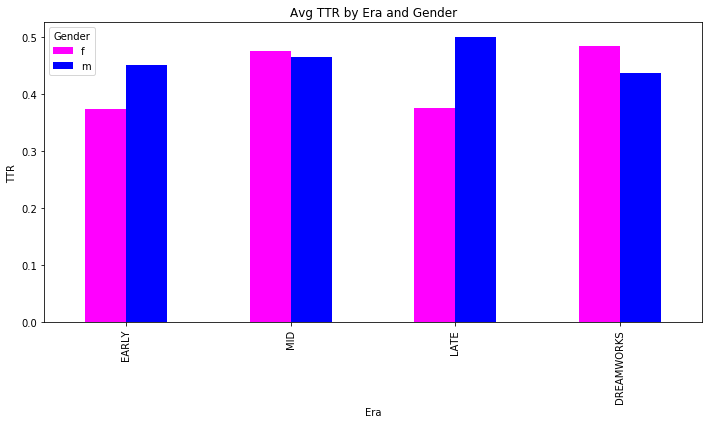

In [69]:
ttr_by_company_gender = all_movies_df.groupby(['Disney_Period', 'Gender'], sort=False)['TTR'].describe()['mean']
ttr_by_company_gender.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (10,6))
plt.title('Avg TTR by Era and Gender')
plt.xlabel('Era')
plt.ylabel('TTR')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_era.png")

Hmmm. So, overall Female speakers have a higher TTR in Dreamworks movies, but in every Disney era save the middle, female speakers have a lower TTR. I would've thought that since Disney movies feature female protagonists, they would have higher TTRs. Maybe this is influenced by the length of their lines...If Dreamworks female characters aren't protagonists, their lines may not be as long, which would influence TTR?

Let's zoom into movies...

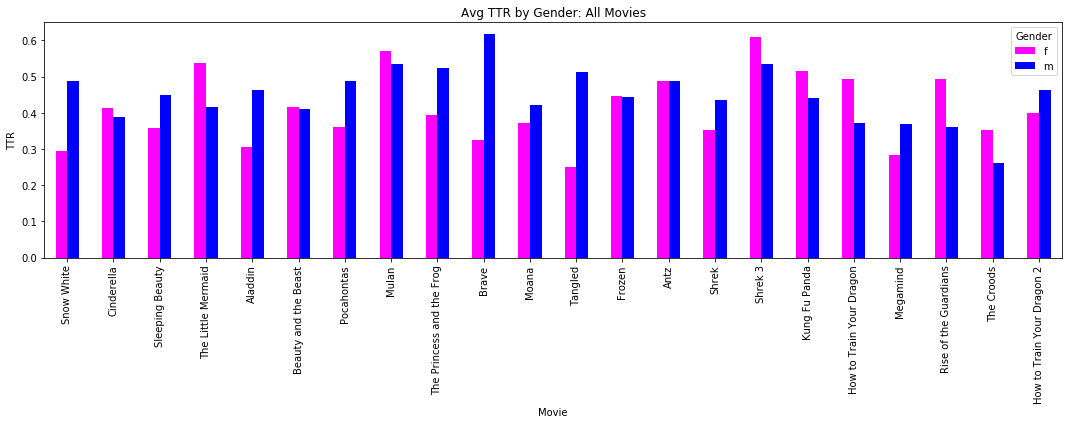

In [70]:
ttr_by_movie_gender = all_movies_df.groupby(['Movie', 'Gender'], sort=False)['TTR'].describe()['mean']
ttr_by_movie_gender.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
plt.xlabel('Movie')
plt.ylabel('TTR')
plt.title('Avg TTR by Gender: All Movies')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_gen_all.png")

In [71]:
all_movies_df_2 = all_movies_df[all_movies_df.Role != 'N']

In [72]:
all_movies_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 628
Data columns (total 14 columns):
Disney_Period       169 non-null object
Gender              169 non-null object
Movie               169 non-null object
Role                169 non-null object
Speaker             169 non-null object
Speaker_Status      169 non-null object
Total_Tok_Count     169 non-null float64
Total_Toks          169 non-null object
Total_Type_Count    169 non-null float64
Total_Types         169 non-null object
Year                169 non-null object
TTR                 169 non-null float64
G_TTR               169 non-null float64
AVG_K_BAND          169 non-null float64
dtypes: float64(5), object(9)
memory usage: 13.9+ KB


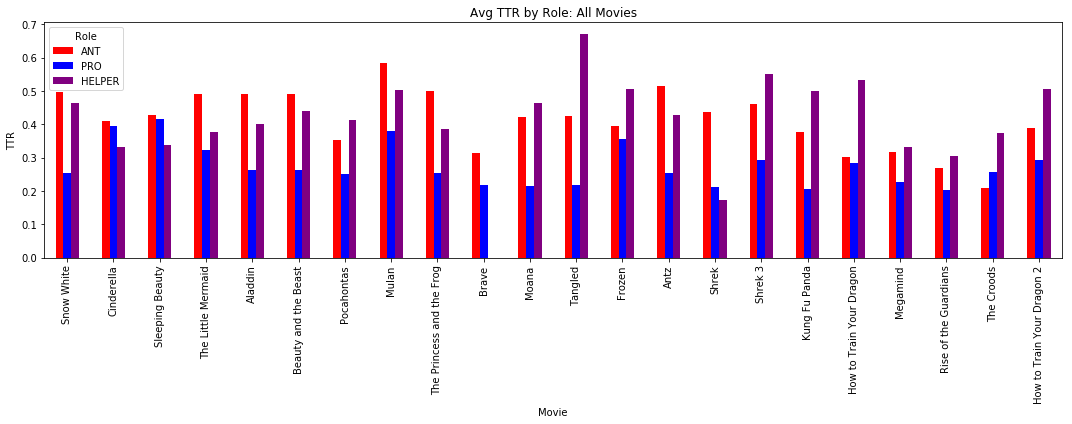

In [73]:
#looking at role...
ttr_by_movie_role = all_movies_df_2.groupby(['Movie', 'Role'], sort=False)['TTR'].describe()['mean']
ttr_by_movie_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15,6))
plt.title('Avg TTR by Role: All Movies')
plt.ylabel('TTR')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_role_all.png")

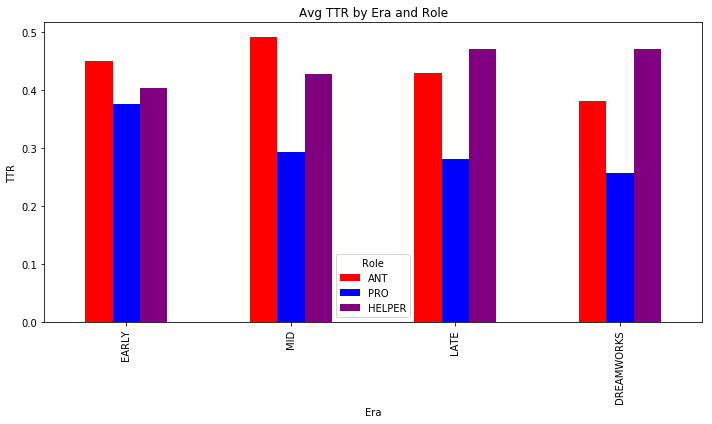

In [74]:
ttr_by_company_role = all_movies_df_2.groupby(['Disney_Period', 'Role'], sort=False)['TTR'].describe()['mean']
ttr_by_company_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title('Avg TTR by Era and Role')
plt.xlabel('Era')
plt.ylabel('TTR')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_era_role.png")

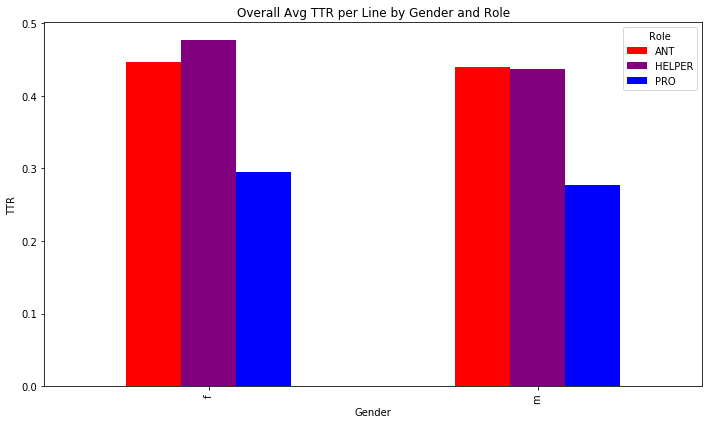

In [75]:
role_lines_3 = all_movies_df_2.groupby(['Gender', 'Role'])["TTR"].describe()["mean"]
role_lines_3.unstack().plot.bar(color=['red', 'purple', 'blue'], figsize = (10,6))
plt.title("Overall Avg TTR per Line by Gender and Role")
plt.ylabel('TTR')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_role_gender.png")

Here, we find that overall, antagonists have a higher TTR. Could this be because they have a more refined vocabulary than the protagonists? Or are their lines simply shorter, creating a higher TTR? The same may be said for helpers...

After line length analysis, we learn that villains' line lengths are actually slightly higher than average. So it looks like villains actually do have a more refined vocabulary.

## K-Bands
Another way to analyze vocabulary complexity is k-bands. I'll apply the following k-band code to each character's list of tokens to determine their average k-band. A higher k-band indicates a higher level of vocabulary complexity

In [76]:
import numpy as np

In [77]:

# thanks Na-Rae for this code!

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 50000:  # limiting to 50k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [78]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('..\private\count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [79]:
all_movies_df['AVG_K_BAND'] = all_movies_df['Total_Toks'].map(get_avg_google_kband)

In [80]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{fix, today, perfect, tune, for, disguise, ahh...",1937,0.334043,10.241551,3.660000
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{white, beauty, maid, what, is, you, hide, fam...",1937,0.703704,6.333333,3.428571
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{going, need, amen, for, so, stop, she, your, ...",1937,0.252640,8.864033,3.270520
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{yes, you, hide, mad, now, child, at, 'll, hig...",1937,0.452632,4.411707,3.610169
5,EARLY,m,Snow White,HELPER,doc,NON-P,903.0,"[look, !, our, house, !, the, lit, 's, lightuh...",288.0,"{remember, going, wake, splash, handsome, foll...",1937,0.318937,9.584040,3.671743


In [81]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 628
Data columns (total 14 columns):
Disney_Period       243 non-null object
Gender              243 non-null object
Movie               243 non-null object
Role                243 non-null object
Speaker             243 non-null object
Speaker_Status      243 non-null object
Total_Tok_Count     243 non-null float64
Total_Toks          243 non-null object
Total_Type_Count    243 non-null float64
Total_Types         243 non-null object
Year                243 non-null object
TTR                 243 non-null float64
G_TTR               243 non-null float64
AVG_K_BAND          243 non-null float64
dtypes: float64(5), object(9)
memory usage: 19.9+ KB


In [82]:
all_movies_df[all_movies_df.AVG_K_BAND.isnull()][['Total_Toks', 'AVG_K_BAND']]

,Total_Toks,AVG_K_BAND


We got some null values because a lot of these are onomatopoeia, names of characters, and I guess concubines is a very high level word? (a closer look reveals that it's on the 86th k-band...)

In [83]:
all_movies_df['AVG_K_BAND'].describe()

count    243.000000
mean       3.284763
std        0.913400
min        1.285714
25%        2.740582
50%        3.116279
75%        3.697386
max        8.433962
Name: AVG_K_BAND, dtype: float64

In [85]:

# thanks Na-Rae for this code!

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 21000:  # limiting to 21k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [86]:
all_movies_df['AVG_K_BAND'] = all_movies_df['Total_Toks'].map(get_avg_google_kband)

In [87]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{fix, today, perfect, tune, for, disguise, ahh...",1937,0.334043,10.241551,2.262369
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{white, beauty, maid, what, is, you, hide, fam...",1937,0.703704,6.333333,2.721311
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{going, need, amen, for, so, stop, she, your, ...",1937,0.252640,8.864033,2.260143
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{yes, you, hide, mad, now, child, at, 'll, hig...",1937,0.452632,4.411707,2.948276
5,EARLY,m,Snow White,HELPER,doc,NON-P,903.0,"[look, !, our, house, !, the, lit, 's, lightuh...",288.0,"{remember, going, wake, splash, handsome, foll...",1937,0.318937,9.584040,2.676007


In [88]:
all_movies_df.info() #15 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 628
Data columns (total 14 columns):
Disney_Period       243 non-null object
Gender              243 non-null object
Movie               243 non-null object
Role                243 non-null object
Speaker             243 non-null object
Speaker_Status      243 non-null object
Total_Tok_Count     243 non-null float64
Total_Toks          243 non-null object
Total_Type_Count    243 non-null float64
Total_Types         243 non-null object
Year                243 non-null object
TTR                 243 non-null float64
G_TTR               243 non-null float64
AVG_K_BAND          243 non-null float64
dtypes: float64(5), object(9)
memory usage: 19.9+ KB


In [89]:
all_movies_df[all_movies_df['AVG_K_BAND'] >=10]

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND


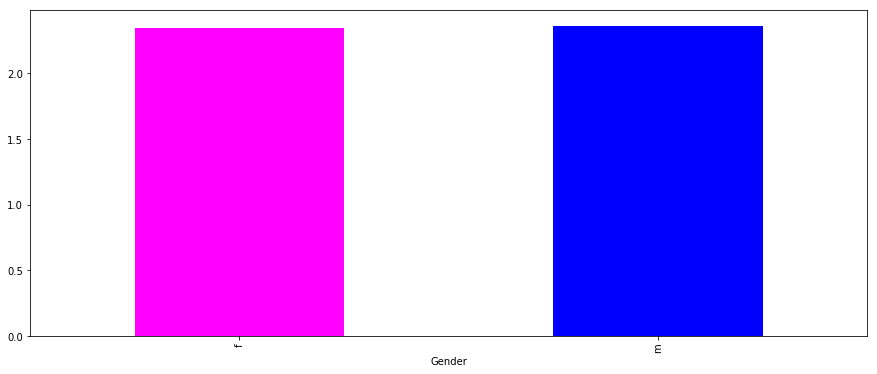

In [90]:
kband_by_gender = all_movies_df.groupby(['Gender'])['AVG_K_BAND'].describe()['mean']
kband_by_gender.plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

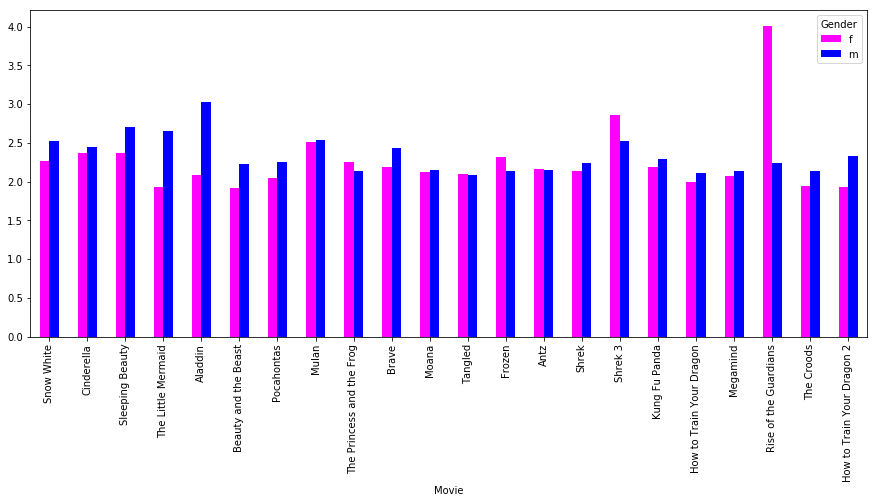

In [91]:
kband_by_gender = all_movies_df.groupby(['Movie','Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_gender.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))

Text(0, 0.5, 'Avg K-Band')

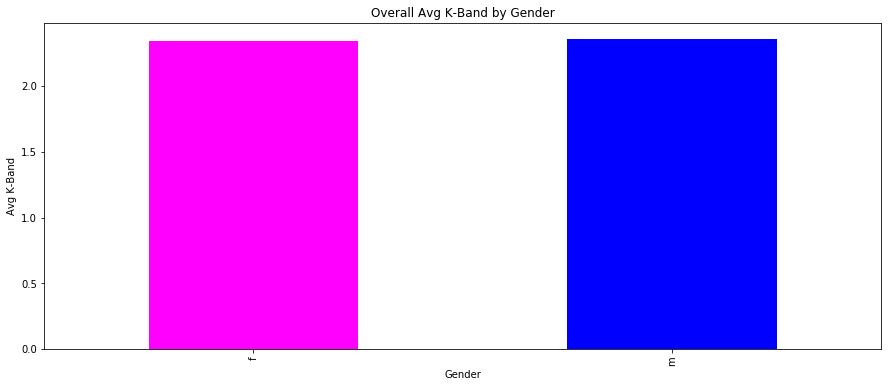

In [92]:
#overall....
kband_by_gender = all_movies_df.groupby(['Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_gender.plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
#pretty low average k-band
#men slightly higher
plt.title('Overall Avg K-Band by Gender')
plt.ylabel('Avg K-Band')
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_kband_gen.png")

In [93]:
all_movies_df.groupby(['Movie','Gender'], sort=False)['AVG_K_BAND'].describe()

count      mean       std       min  \
Movie                      Gender                                        
Snow White                 f         2.0  2.261256  0.001574  2.260143   
                           m         9.0  2.529012  0.249337  2.170940   
Cinderella                 f         6.0  2.363340  0.434965  1.875000   
                           m         5.0  2.444098  0.895051  1.285714   
Sleeping Beauty            f         5.0  2.371625  0.284358  2.135550   
                           m         4.0  2.708774  0.637398  2.026846   
The Little Mermaid         f         5.0  1.932705  0.357728  1.365854   
                           m         7.0  2.648457  0.423911  2.287879   
Aladdin                    f         1.0  2.090647       NaN  2.090647   
                           m        12.0  3.023189  1.294390  2.138889   
Beauty and the Beast       f         3.0  1.919131  0.137563  1.761194   
                           m         9.0  2.223757  0.396731  1.745731   
Pocahontas                 f         3.0  2.039905  0.205315  1.888889   
                           m        10.0  2.250436  0.397330  1.792553   
Mulan                      f         4.0  2.507524  0.269177  2.131054   
                           m        10.0  2.540793  0.285260  2.189655   
The Princess and the Frog  f         4.0  2.247145  0.359923  1.854545   
                           m        12.0  2.133040  0.251216  1.769231   
Brave                      f         3.0  2.188612  0.039611  2.143406   
                           m         4.0  2.431189  0.438526  1.884615   
Moana                      f         3.0  2.117310  0.300946  1.821053   
                           m         4.0  2.144300  0.378109  1.723214   
Tangled                    f         2.0  2.098814  0.021741  2.083440   
                           m         4.0  2.080830  0.136509  1.949367   
Frozen                     f         5.0  2.317345  0.592503  1.763689   
                           m         8.0  2.133321  0.227032  1.752809   
Antz                       f         4.0  2.166872  0.058922  2.127729   
                           m         9.0  2.144095  0.335523  1.727273   
Shrek                      f         2.0  2.141295  0.250329  1.964286   
                           m         7.0  2.237874  0.303683  1.697674   
Shrek 3                    f         8.0  2.858858  0.486924  2.235849   
                           m        13.0  2.520009  0.340810  2.000000   
Kung Fu Panda              f         2.0  2.189110  0.576801  1.781250   
                           m        10.0  2.288944  0.242963  1.897436   
How to Train Your Dragon   f         2.0  1.993321  0.142549  1.892523   
                           m         8.0  2.108576  0.330603  1.745455   
Megamind                   f         1.0  2.069027       NaN  2.069027   
                           m         5.0  2.135954  0.078188  2.017405   
Rise of the Guardians      f         4.0  4.007577  2.180944  2.492936   
                           m         7.0  2.235980  0.158716  2.004677   
The Croods                 f         3.0  1.944914  0.104112  1.826754   
                           m         3.0  2.130578  0.209032  1.922719   
How to Train Your Dragon 2 f         3.0  1.933802  0.077366  1.847619   
                           m         8.0  2.327079  0.474008  1.906667   

                                        25%       50%       75%       max  
Movie                      Gender                                          
Snow White                 f       2.260700  2.261256  2.261812  2.262369  
                           m       2.285714  2.550388  2.676007  2.948276  
Cinderella                 f       2.169647  2.253336  2.445743  3.146739  
                           m       2.083784  2.162353  3.216641  3.472000  
Sleeping Beauty            f       2.208661  2.273572  2.387805  2.852535  
                           m       2.376841  2.630189  2.962121  3.547872  
The Little Mermaid    

In [94]:
#What if you average this over number of speakers?
#What if we look exclusively at male and female protagonists?

In [95]:
all_movies_df_2 = all_movies_df[all_movies_df.Role != 'N']

In [96]:
all_movies_df_2.info() #6 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 628
Data columns (total 14 columns):
Disney_Period       169 non-null object
Gender              169 non-null object
Movie               169 non-null object
Role                169 non-null object
Speaker             169 non-null object
Speaker_Status      169 non-null object
Total_Tok_Count     169 non-null float64
Total_Toks          169 non-null object
Total_Type_Count    169 non-null float64
Total_Types         169 non-null object
Year                169 non-null object
TTR                 169 non-null float64
G_TTR               169 non-null float64
AVG_K_BAND          169 non-null float64
dtypes: float64(5), object(9)
memory usage: 13.9+ KB


In [97]:
all_movies_df_2.groupby(['Movie','Role','Gender'], sort=False)['AVG_K_BAND'].describe()

count      mean       std       min  \
Movie                      Role   Gender                                        
Snow White                 ANT    f         1.0  2.262369       NaN  2.262369   
                                  m         2.0  2.834794  0.160488  2.721311   
                           PRO    f         1.0  2.260143       NaN  2.260143   
                           HELPER m         7.0  2.441646  0.196282  2.170940   
Cinderella                 ANT    f         3.0  2.213674  0.319008  1.875000   
                           PRO    f         1.0  2.143156       NaN  2.143156   
                                  m         1.0  1.285714       NaN  1.285714   
                           HELPER f         1.0  2.249123       NaN  2.249123   
                                  m         2.0  2.777892  0.981617  2.083784   
Sleeping Beauty            ANT    f         1.0  2.852535       NaN  2.852535   
                           PRO    f         1.0  2.208661       NaN  2.208661   
                                  m         1.0  2.026846       NaN  2.026846   
                           HELPER f         3.0  2.265642  0.126314  2.135550   
The Little Mermaid         ANT    f         2.0  2.015194  0.037438  1.988722   
                                  m         1.0  2.287879       NaN  2.287879   
                           PRO    f         1.0  1.915929       NaN  1.915929   
                                  m         1.0  2.776042       NaN  2.776042   
                           HELPER m         4.0  2.487001  0.135797  2.292398   
Aladdin                    ANT    m         5.0  2.783700  0.568131  2.189189   
                           PRO    f         1.0  2.090647       NaN  2.090647   
                                  m         1.0  2.670528       NaN  2.670528   
                           HELPER m         3.0  3.935417  2.586726  2.384683   
Beauty and the Beast       ANT    m         3.0  2.281869  0.123119  2.150082   
                           PRO    f         1.0  1.983420       NaN  1.983420   
                                  m         2.0  1.840257  0.133680  1.745731   
                           HELPER f         2.0  1.886987  0.177898  1.761194   
                                  m         3.0  2.336967  0.634124  1.821429   
Pocahontas                 ANT    m         2.0  2.106750  0.010016  2.099668   
                           PRO    f         1.0  1.888889       NaN  1.888889   
                                  m         1.0  1.792553       NaN  1.792553   
...                                         ...       ...       ...       ...   
Shrek 3                    PRO    f         1.0  2.934555       NaN  2.934555   
                                  m         2.0  2.130222  0.184162  2.000000   
                           HELPER f         4.0  2.983626  0.625826  2.417431   
                                  m         5.0  2.484387  0.378008  2.131579   
Kung Fu Panda              ANT    m         1.0  2.218310       NaN  2.218310   
                           PRO    m         1.0  2.613928       NaN  2.613928   
                           HELPER f         2.0  2.189110  0.576801  1.781250   
                                  m         5.0  2.197851  0.189290  1.897436   
How to Train Your Dragon   ANT    m         1.0  1.950749       NaN  1.950749   
                           PRO    f         1.0  1.892523       NaN  1.892523   
                                  m         1.0  2.201826       NaN  2.201826   
                           HELPER f         1.0  2.094118       NaN  2.094118   
                                  m         3.0  2.136448  0.557633  1.745455   
Megamind                   ANT    m         1.0  2.110329       NaN  2.110329   
                           PRO    m         1.0  2.150427       NaN  2.150427   
                           HELPER m         1.0  2.017405       NaN  2.017405   
Rise of the Guardians      ANT    m         1.0  2.004677       NaN  2.00

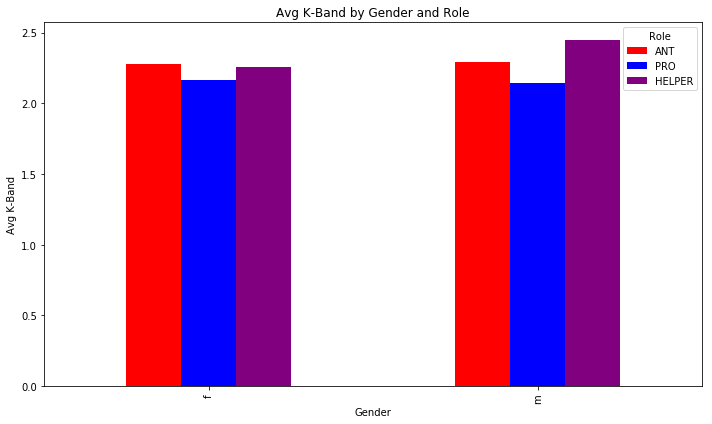

In [98]:
kband_by_movie_role_gender = all_movies_df_2.groupby(['Gender','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_movie_role_gender.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title('Avg K-Band by Gender and Role')
plt.ylabel('Avg K-Band')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_gen_role.png")

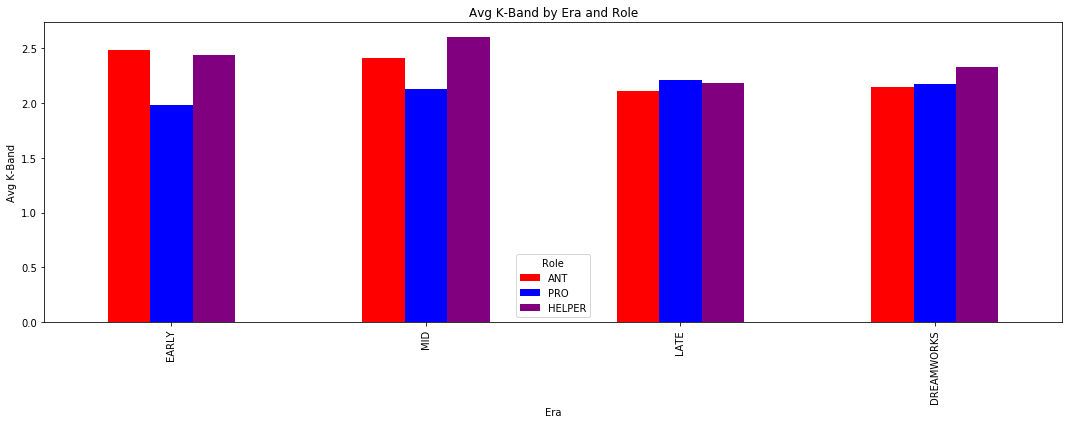

In [99]:
kband_by_era_role = all_movies_df_2.groupby(['Disney_Period','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_era_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15,6))
plt.title("Avg K-Band by Era and Role")
plt.ylabel('Avg K-Band')
plt.xlabel('Era')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_era_role.png")

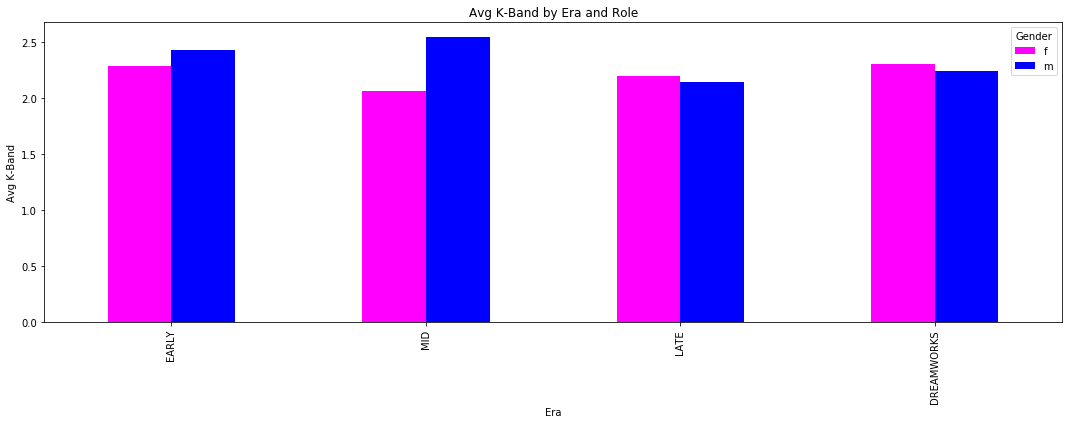

In [100]:
kband_by_era_gen = all_movies_df_2.groupby(['Disney_Period','Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_era_gen.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
plt.title("Avg K-Band by Era and Role")
plt.ylabel('Avg K-Band')
plt.xlabel('Era')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_era_role.png")

So... female protagonists and female helpers average a higher k-band than male protagonists and male speakers...

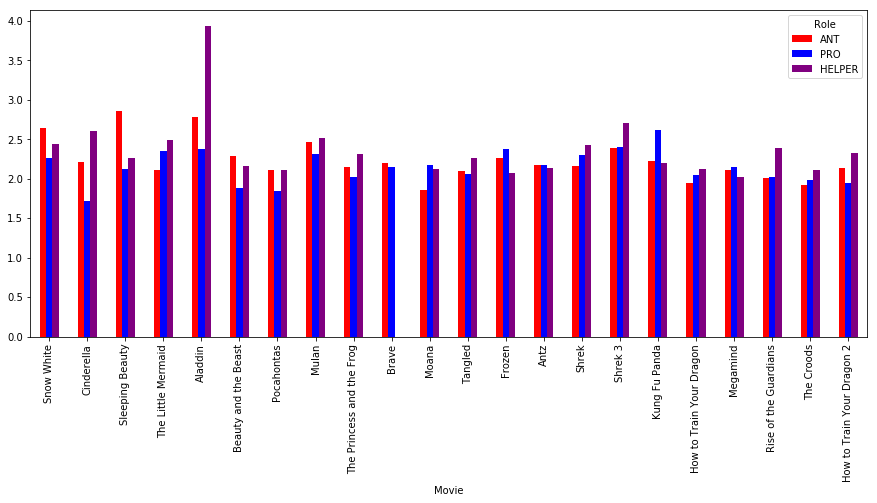

In [101]:
kband_by_movie_role = all_movies_df_2.groupby(['Movie','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_movie_role.unstack().plot.bar(color = ['red', 'blue', 'purple', 'green'], figsize = (15,6))

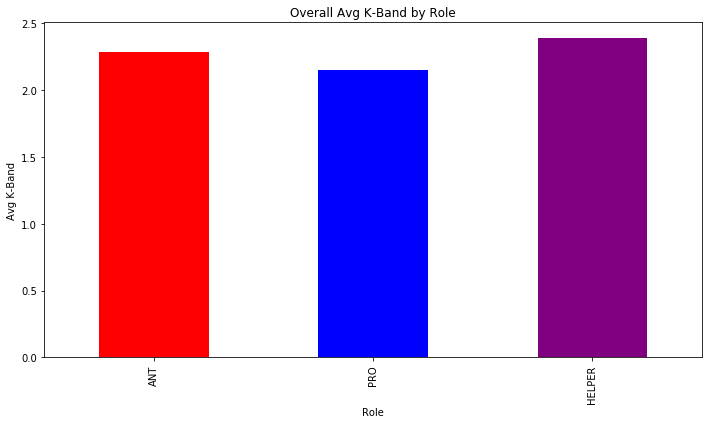

In [102]:
#villlains seem to have higher k-bands in older movies, but this has decreased over time
kband_by_role = all_movies_df_2.groupby(['Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_role.plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title("Overall Avg K-Band by Role")
plt.ylabel('Avg K-Band')
plt.tight_layout()
#plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_kband_role.png")